# Check Pie Grouping

In [1]:
import geopandas as gpd
import shapely as sh

from lets_plot import *


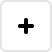
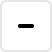
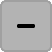
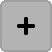
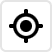
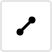
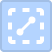
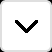
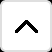
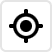
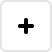
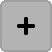
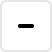
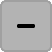
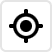
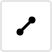
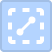
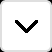
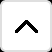
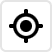

In [2]:
LetsPlot.setup_html()

In [3]:
data1 = {
    "City_Code": [ "A", "A", "B", "B" ], 
    "City_Name": [ "City A", "City A", "City B", "City B" ],
    "Vote": [ "Yes", "No", "Yes", "No" ], 
    "Number": [ 120.0, 30.0, 20.0, 80.0 ], 
}
cities = gpd.GeoDataFrame({
    "id": [ "A", "B" ],
    "geometry": [
        sh.geometry.Point(-80.0, -40.0),
        sh.geometry.Point(80.0, 40.0)
    ]
}, crs="EPSG:4326")

In [4]:
def plot(data):
    return ggplot(data) + \
        scale_x_continuous(expand=[0.3]) + \
        scale_y_continuous(expand=[0.3])

points = geom_point(map=cities, map_join=["City_Code", "id"], shape=21, fill="yellow")

## With `map_join`

In [5]:
params = {"map": cities, "map_join": ["City_Code", "id"]}

gggrid([
    plot(data1) + geom_pie(
            aes(fill="Vote", weight="Number",
                group="City_Code"), 
            **params
        ) + \
    points + ggtitle('group="City_Code"'),
    plot(data1) + geom_pie(
            aes(fill="Vote", weight="Number",
                group=["City_Code", "Vote"]), 
            **params
        ) + \
    points + ggtitle('group=["City_Code", "Vote"]'),
    plot(data1) + geom_pie(
            aes(fill="Vote", slice="Number"),
            stat='identity', 
            **params
        ) + \
    points + ggtitle("Without group, stat='identity'"),
    plot(data1) + geom_pie(
            aes(fill="Vote", weight="Number"), 
            **params
        ) + \
    points + ggtitle("Without group"),
    plot(data1) + geom_pie(**params) + \
    points + ggtitle("Without any mapping"),
], ncol=3)

## Without `map_join`

In [6]:
data2 = {
    "City_Code": [ "A", "A", "B", "B" ], 
    "City_Name": [ "City A", "City A", "City B", "City B" ],
    "Vote": [ "Yes", "No", "Yes", "No" ], 
    "Number": [ 120.0, 30.0, 20.0, 80.0 ], 
    "x": [-80.0, -80.0, 80.0, 80.0],
    "y": [-40.0, -40.0, 40.0, 40.0]
}

In [7]:
gggrid([
    plot(data2) + geom_pie(
        aes("x", "y", fill="Vote", weight="Number",
            group="City_Code")
    ) + points + ggtitle('group="City_Code"'),
    plot(data2) + geom_pie(
        aes("x", "y", fill="Vote", weight="Number",
            group=["City_Code", "Vote"])
    ) + points + ggtitle('group=["City_Code", "Vote"]'),
    plot(data2) + geom_pie(
        aes("x", "y", fill="Vote", slice="Number"),
        stat='identity'
    ) + points + ggtitle("Without group, stat='identity'"),
    plot(data2) + geom_pie(
        aes("x", "y", fill="Vote", weight="Number")
    ) + points + ggtitle("Without group"),
    plot(data2) + geom_pie(
        aes("x", "y")
    ) + points + ggtitle("Without any mapping"),
], ncol=3)